# P2: Investigate a Dataset

---

### Summary
This is the P2-Investigate a Dataset project for Data Analysis Nanodegree of Udacity. The goal is to conduct data analysis and to share the findings through this report.  

The dataset chosen for this project is [Titanic Data](https://www.udacity.com/api/nodes/5420148578/supplemental_media/titanic-datacsv/download), which contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. The description of this dataset can be found on the [Kaggle website](https://www.kaggle.com/c/titanic/data).

### Questions To Be Explored

The key question this project tries to answer is - "what key factors among below list made people more likely to survive?". This is not a complete list and merely the focus of this project.
- Sex (i.e. whether priority given to female)
- Age (i.e. whether priority given to infants and children)
- Passenger Class (i.e. whether priority given to higher class passengers)


### Data Processing

#### Acquisition  
The dataset in CSV format was directly downloaded from Udacity link provided. There's no extra effort put into this project as far as data acquisition is concerned.

#### Loading

In [191]:
# The usual preamble
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# loading Titanic Data in csv file
full_df = pd.read_csv('titanic_data.csv')

# showing the first few lines of data
full_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


#### Wrangling

In [192]:
# subsetting dataset to keep only those columns of interest (see Questions section)
df = full_df[['Survived', 'Sex', 'Pclass', 'Age']]
df.head()

,Survived,Sex,Pclass,Age
0,0,male,3,22
1,1,female,1,38
2,1,female,3,26
3,1,female,1,35
4,0,male,3,35


In [193]:
# checking missing values on 'Survived' column
survived_missing_count = df['Survived'].isnull().sum()
print "Missing values in Survived count:{}".format(survived_missing_count)

Missing values in Survived count:0


In [194]:
# checking missing values on 'Sex' column
sex_missing_count = df['Sex'].isnull().sum()
print "Missing values in Sex count:{}".format(sex_missing_count)

Missing values in Sex count:0


In [195]:
import warnings
warnings.filterwarnings('ignore')

# Transform 'Sex' to 'Sex_Int' (adding new column; male=1, female=0)
# This is for Pearson's r calculation
def convert_sex_to_int(sex):
    if sex == 'male':
        return 1
    else:
        return 0

df['Sex_Int'] = df['Sex'].apply(convert_sex_to_int)

In [196]:
# checking missing values on 'Pclass' column
pclass_missing_count = df['Pclass'].isnull().sum()
print "Missing values in Pclass count:{}".format(pclass_missing_count)

Missing values in Pclass count:0


In [197]:
# checking missing values on 'Age' column
age_missing_count = df['Age'].isnull().sum()
print "Missing values in Age count:{}".format(age_missing_count)

Missing values in Age count:177


In [198]:
# While there could be various way to impute missing values
# dropping rows with missing age value approach is adopted for this analysis
# this dataframe will be used only when 'Age' is concerned;
# missing age values don't have impact on exploratory analysis on other non age factors.
df_no_missing = df[df['Age'].notnull()]

### Exploratory Analysis


#### Dataset Summary

In [199]:
df.describe()

,Survived,Pclass,Age,Sex_Int
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,0.647587
std,0.486592,0.836071,14.526497,0.477990
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,0.000000
50%,0.000000,3.000000,28.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000
max,1.000000,3.000000,80.000000,1.000000


From above, we can tell that all columns' values are within normal ranges (no unexpected values).

#### Overall Survivability and Mortality Rate

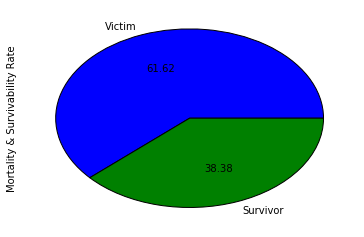

In [200]:
# Overall Survivor and Victim Counts
survivor_counts = df['Survived'].value_counts()
survivor_counts.index = ['Victim', 'Survivor']
survivor_counts.name = 'Mortality & Survivability Rate'
survivor_counts.plot(kind='pie', autopct='%.2f')

The overall survivability and mortality rate are 38.38% and 61.62% respectively. Following analysis will be drilling further down and see if there is correlation between Surviability/Mortality and Sex, Passenger Class and Age.

#### Survivability and  Gender Correlation

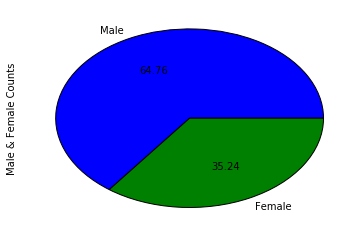

In [201]:
# Overall gender counts
gender_counts = df['Sex'].value_counts()
gender_counts.index = ['Male', 'Female']
gender_counts.name = "Male & Female Counts"
gender_counts.plot(kind='pie', autopct='%.2f')

From the dataset being analysed, male and female are 64.76% and 35.24%.

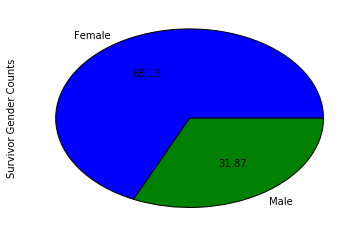

In [202]:
# Gender distribution among survior
survivor_gender_counts = df[df['Survived']==1]['Sex'].value_counts()
survivor_gender_counts.index = ['Female', 'Male']
survivor_gender_counts.name = "Survivor Gender Counts"
survivor_gender_counts.plot(kind='pie', autopct='%.2f')

From above pie chart, we can tell that female has much bigger proportion among survivors compared with overall female proportion in the dataset. There could be multiple explanations:
* female was given higher priority
* higher Pclass happened to have more female
* or more children (girls) were given higher priority to abort titanic

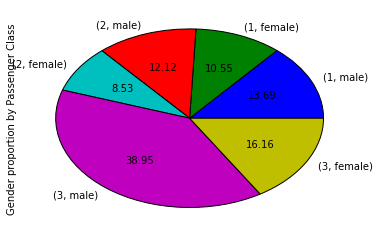

In [203]:
# Gender distribution among Passenger Class (1=1st; 2=2nd; 3=3rd)
grouped_by_pclass = df['Sex'].groupby(df['Pclass'])
grouped_counts = grouped_by_pclass.value_counts()
grouped_counts.name = "Gender proportion by Passenger Class"
grouped_counts.plot(kind='pie', autopct='%.2f')

Above pie chart indicates that female doesn't have more significant proportion among any of the Passenger Classes(1，2 and 3). So we can conclude that 68.18% of survivors are female is not due to that any of the Passenger Class having more females.

Now let's explore the relationship between Survived and Age.

#### Survivability and Age Correlation

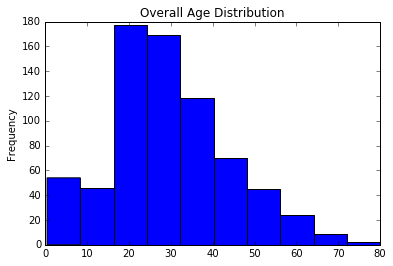

In [204]:
# Distribution of overall Passenger age
df_no_missing['Age'].plot(kind='hist', title="Overall Age Distribution")

Passengers' age distribution is roughly normal (slightly positive skewed).

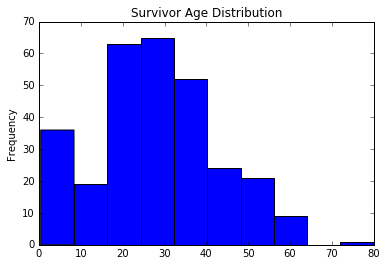

In [205]:
# Distribution of Passenger age of survivors 
df_no_missing[df_no_missing['Survived']==1]['Age'].plot(kind='hist', title="Survivor Age Distribution")

Survivor age's distribution is pretty much aligned with the overall age distribution with exception that passenger of age below 10 among survivor has relatively bigger proportion.

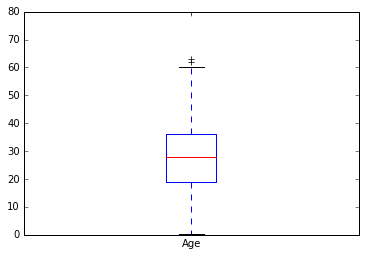

In [206]:
# Age distribution among survivors
df_no_missing[df_no_missing['Survived']==1]['Age'].plot(kind='box')

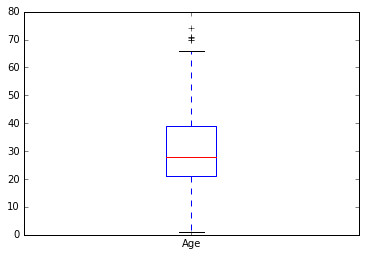

In [207]:
# Age distribution among victims
df_no_missing[df_no_missing['Survived']==0]['Age'].plot(kind='box')

From above two box plots, there is no sinificant age distribution difference between survivors and victims.

#### Survivability and Passenger Class Correlation

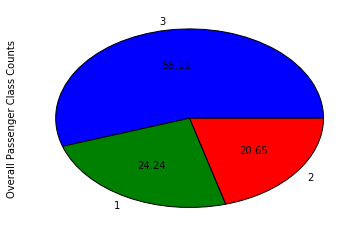

In [208]:
# Passenger Class(1/2/3) distribution - overall
pclass_counts = df['Pclass'].value_counts()
pclass_counts.name = "Overall Passenger Class Counts"
pclass_counts.plot(kind='pie', autopct='%.2f')

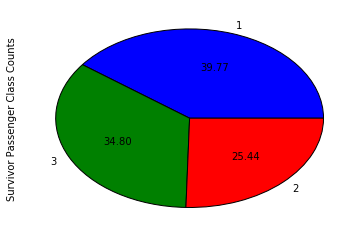

In [209]:
# Passenger Class(1/2/3) distribution among surviors
survivor_pclass_counts = df[df['Survived']==1]['Pclass'].value_counts()
survivor_pclass_counts.name = "Survivor Passenger Class Counts"
survivor_pclass_counts.plot(kind='pie', autopct='%.2f')

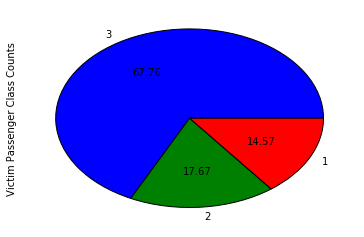

In [210]:
# Passenger Class(1/2/3) distribution among victims 
victim_pclass_counts = df[df['Survived']==0]['Pclass'].value_counts()
victim_pclass_counts.name = "Victim Passenger Class Counts"
victim_pclass_counts.plot(kind='pie', autopct='%.2f')

From above 3 plots, 1st Pclass accounted for 24.24% of total passengers in the dataset; however it accounted for 39.77% of the survivor. 2nd Pclass's proportion in survivors was also higher(5% more) than its proportion in totol passenger base. So we can conclude that Passenger Class is correlated to 

#### Calculated Correlation by Pearson's r

In [211]:
# function to calcualte correlation (Pearson's r)
def correlation(x, y):
    x_mean = x.mean()
    x_sd = x.std(ddof=0)
    y_mean = y.mean()
    y_sd = y.std(ddof=0)
    x_standard = (x - x_mean)/x_sd
    y_standard = (y - y_mean)/y_sd
    
    return (x_standard * y_standard).mean()

In [212]:
from scipy.stats import pearsonr

In [213]:
coef, p_val = pearsonr(df_no_missing['Survived'], df_no_missing['Sex_Int'])
print 'Correlation coefficient between Survived and Sex: {}'.format(coef)
print "2-tailed p-value is: {}".format(p_val)

Correlation coefficient between Survived and Sex: -0.538825593015
2-tailed p-value is: 5.2247099268e-55


In [214]:
coef, p_val = pearsonr(df_no_missing['Survived'], df_no_missing['Age'])
print 'Correlation coefficient between Survived and Age: {}'.format(coef)
print "2-tailed p-value is: {}".format(p_val)

Correlation coefficient between Survived and Age: -0.0772210945722
2-tailed p-value is: 0.0391246540135


In [215]:
coef, p_val = pearsonr(df_no_missing['Survived'], df_no_missing['Pclass'])
print 'Correlation coefficient between Survived and Pclass: {}'.format(coef)
print "2-tailed p-value is: {}".format(p_val)

Correlation coefficient between Survived and Pclass: -0.359652682087
2-tailed p-value is: 3.16210354167e-23


Given that above calculated Pearson's r values have all p-values less than 0.05, which are considered statistically significant; dataset(df_no_missing) size is greater than 500, we can conclude with 95% confidence that survivability has correlation with Sex and Pclass but very little with Age. The calculation is based on dataframe 'df_no_missing' where observations with missing Age value were dropped(177 out of 891). This is based on the assumption that data were missing completely at random; dropping those data does NOT add any bias although it does decrease the effective sample size.

### Conclusion

Both Pearson's r values and data visualization in this analysis indicates that 'Sex' and 'Pclass' were the two key factors that made passengers on Titanic more likely to survie; Age however has little correlation with survivability.

Known limitations on this analysis are:
* the dataset was just the subset of original dataset provided where only 'Sex', 'Pclass' and 'Age' were included. While claiming that 'Sex' and 'Pclass' had strong correlation with 'Survived', we can't rule out the possibility that there were hidden confounding factors beside 'Sex' and 'Pclass'.
* dropping observations with missing 'Age' values was based on the assumption that data were missing completely random and no bias was introduced.